# CPI VISION


In [346]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.options.display.max_columns = 2000
pd.options.display.max_rows = 2000
import datetime

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from collections import defaultdict



import warnings
warnings.filterwarnings('ignore')

In [347]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [348]:
cpi_hist = pd.read_csv('/content/drive/MyDrive/CPI_HistoryMar_23.csv')
cpi_hist.head()

,Month,Category,Value,Percentage Change (From Prior Month)
0,31-03-2023,Headline_CPI,109.0,1.0
1,31-03-2023,Food and non-alcoholic beverages,116.7,1.0
2,31-03-2023,Alcoholic beverages and tobacco,109.2,2.2
3,31-03-2023,Clothing and footwear,103.4,-0.1
4,31-03-2023,Housing and utilities,104.5,0.4


In [349]:
cpi_hist.isna().sum()

Month                                   0
Category                                0
Value                                   0
Percentage Change (From Prior Month)    0
dtype: int64

In [350]:
cpi_hist.duplicated().sum()

0

In [351]:
cpi_hist['Category'].unique()

array(['Headline_CPI', 'Food and non-alcoholic beverages',
       'Alcoholic beverages and tobacco', 'Clothing and footwear',
       'Housing and utilities', 'Household contents and services',
       'Health', 'Transport', 'Communication', 'Recreation and culture',
       'Education', 'Restaurants and hotels ',
       'Miscellaneous goods and services'], dtype=object)

In [352]:
cpi_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 4 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Month                                 195 non-null    object 
 1   Category                              195 non-null    object 
 2   Value                                 195 non-null    float64
 3   Percentage Change (From Prior Month)  195 non-null    float64
dtypes: float64(2), object(2)
memory usage: 6.2+ KB


In [353]:
cpi_hist['Month'] = pd.to_datetime(cpi_hist['Month'])

In [354]:
cpi_pivot = cpi_hist.pivot(index = 'Month', columns = 'Category', values = 'Value').reset_index()#changing from a long format to a wide format,
cpi_pivot = cpi_pivot.sort_values("Month").reset_index(drop=True)
cpi_pivot


Category,Month,Alcoholic beverages and tobacco,Clothing and footwear,Communication,Education,Food and non-alcoholic beverages,Headline_CPI,Health,Household contents and services,Housing and utilities,Miscellaneous goods and services,Recreation and culture,Restaurants and hotels,Transport
0,2022-01-31,100.0,100.2,99.8,100.0,100.9,100.2,100.1,100.4,100.0,100.6,100.2,101.2,98.9
1,2022-02-28,100.6,100.3,99.7,100.0,101.8,100.8,103.2,100.4,100.1,101.5,100.3,101.9,100.6
2,2022-03-31,102.8,100.5,99.7,104.4,102.4,101.8,103.7,100.8,100.5,101.9,100.4,103.0,103.7
3,2022-04-30,103.6,100.7,99.6,104.4,103.1,102.4,104.0,101.1,100.5,102.8,100.7,103.3,105.1
4,2022-05-31,104.4,100.9,99.9,104.4,105.3,103.1,104.3,101.8,100.6,102.9,101.0,103.8,105.9
5,2022-06-30,104.5,101.3,100.3,104.4,106.6,104.2,104.6,103.0,101.2,103.0,101.2,104.2,110.3
6,2022-07-31,104.4,101.6,99.4,104.4,107.8,105.8,104.1,103.3,103.1,103.4,102.3,104.6,115.6
7,2022-08-31,104.7,102.1,100.1,104.4,109.7,106.0,104.2,103.7,103.2,103.5,102.4,104.3,114.5
8,2022-09-30,105.6,102.5,99.9,104.4,110.3,106.1,104.0,104.5,103.7,103.8,102.5,106.2,112.0
9,2022-10-31,106.1,102.6,99.8,104.4,111.3,106.5,104.5,105.0,103.8,104.7,102.7,107.4,111.7


In [355]:
cpi_pivot['Month'] = pd.to_datetime(cpi_pivot['Month'], format='%B %Y-%d')
cpi_pivot

Category,Month,Alcoholic beverages and tobacco,Clothing and footwear,Communication,Education,Food and non-alcoholic beverages,Headline_CPI,Health,Household contents and services,Housing and utilities,Miscellaneous goods and services,Recreation and culture,Restaurants and hotels,Transport
0,2022-01-31,100.0,100.2,99.8,100.0,100.9,100.2,100.1,100.4,100.0,100.6,100.2,101.2,98.9
1,2022-02-28,100.6,100.3,99.7,100.0,101.8,100.8,103.2,100.4,100.1,101.5,100.3,101.9,100.6
2,2022-03-31,102.8,100.5,99.7,104.4,102.4,101.8,103.7,100.8,100.5,101.9,100.4,103.0,103.7
3,2022-04-30,103.6,100.7,99.6,104.4,103.1,102.4,104.0,101.1,100.5,102.8,100.7,103.3,105.1
4,2022-05-31,104.4,100.9,99.9,104.4,105.3,103.1,104.3,101.8,100.6,102.9,101.0,103.8,105.9
5,2022-06-30,104.5,101.3,100.3,104.4,106.6,104.2,104.6,103.0,101.2,103.0,101.2,104.2,110.3
6,2022-07-31,104.4,101.6,99.4,104.4,107.8,105.8,104.1,103.3,103.1,103.4,102.3,104.6,115.6
7,2022-08-31,104.7,102.1,100.1,104.4,109.7,106.0,104.2,103.7,103.2,103.5,102.4,104.3,114.5
8,2022-09-30,105.6,102.5,99.9,104.4,110.3,106.1,104.0,104.5,103.7,103.8,102.5,106.2,112.0
9,2022-10-31,106.1,102.6,99.8,104.4,111.3,106.5,104.5,105.0,103.8,104.7,102.7,107.4,111.7


Visaualzing CPI categories

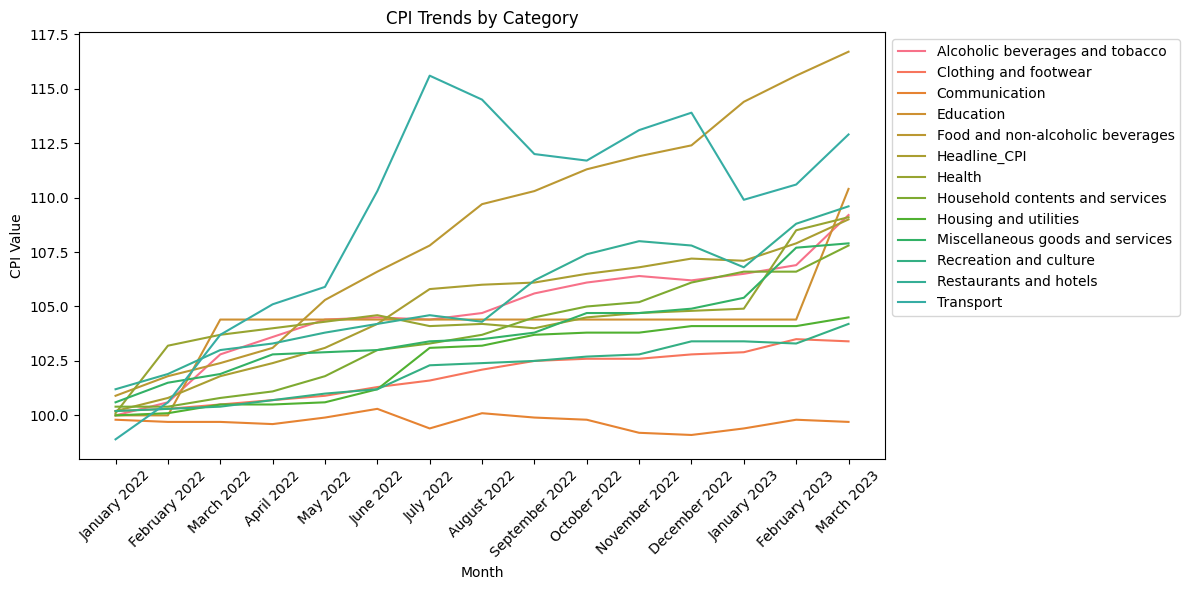

In [356]:


# Set the figure size
plt.figure(figsize=(12, 6))

# Format the 'Month' column to include month names
cpi_pivot['Month'] = cpi_pivot['Month'].apply(lambda x: pd.to_datetime(x).strftime('%B %Y'))

# Set a larger Seaborn color palette with 12 distinct colors
colors = sns.color_palette('husl', 12 * 2)

# Plot CPI trends for each category
for i, column in enumerate(cpi_pivot.columns[1:]):
    plt.plot(cpi_pivot['Month'], cpi_pivot[column], label=column, color=colors[i])

# Customize the plot
plt.xlabel('Month')
plt.ylabel('CPI Value')
plt.title('CPI Trends by Category')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


In [357]:
date_str = '2023-04-30'
date_str2 = '2023-05-30'
date_str3 = '2023-06-30'
date_obj = pd.to_datetime(date_str)
date_obj1 = pd.to_datetime(date_str2)
date_obj2 = pd.to_datetime(date_str3)

new_row = pd.DataFrame({'Month': [date_obj]})
new_row2 = pd.DataFrame({'Month': [date_obj1]})
new_row3 = pd.DataFrame({'Month':[date_obj2]})

cpi_pivot = pd.concat([cpi_pivot, new_row,new_row2,new_row3]).reset_index(drop=True)
cpi_pivot

,Month,Alcoholic beverages and tobacco,Clothing and footwear,Communication,Education,Food and non-alcoholic beverages,Headline_CPI,Health,Household contents and services,Housing and utilities,Miscellaneous goods and services,Recreation and culture,Restaurants and hotels,Transport
0,January 2022,100.0,100.2,99.8,100.0,100.9,100.2,100.1,100.4,100.0,100.6,100.2,101.2,98.9
1,February 2022,100.6,100.3,99.7,100.0,101.8,100.8,103.2,100.4,100.1,101.5,100.3,101.9,100.6
2,March 2022,102.8,100.5,99.7,104.4,102.4,101.8,103.7,100.8,100.5,101.9,100.4,103.0,103.7
3,April 2022,103.6,100.7,99.6,104.4,103.1,102.4,104.0,101.1,100.5,102.8,100.7,103.3,105.1
4,May 2022,104.4,100.9,99.9,104.4,105.3,103.1,104.3,101.8,100.6,102.9,101.0,103.8,105.9
5,June 2022,104.5,101.3,100.3,104.4,106.6,104.2,104.6,103.0,101.2,103.0,101.2,104.2,110.3
6,July 2022,104.4,101.6,99.4,104.4,107.8,105.8,104.1,103.3,103.1,103.4,102.3,104.6,115.6
7,August 2022,104.7,102.1,100.1,104.4,109.7,106.0,104.2,103.7,103.2,103.5,102.4,104.3,114.5
8,September 2022,105.6,102.5,99.9,104.4,110.3,106.1,104.0,104.5,103.7,103.8,102.5,106.2,112.0
9,October 2022,106.1,102.6,99.8,104.4,111.3,106.5,104.5,105.0,103.8,104.7,102.7,107.4,111.7


#### Converting the 'Month' column back to appropriate datatype and extracting year and month from the 'Month' column

In [358]:

cpi_pivot['Month']= pd.to_datetime(cpi_pivot['Month'])
cpi_pivot['year_month'] = pd.to_datetime(cpi_pivot['Month'], format='%Y-%b').dt.strftime('%Y-%m')

cpi_pivot

,Month,Alcoholic beverages and tobacco,Clothing and footwear,Communication,Education,Food and non-alcoholic beverages,Headline_CPI,Health,Household contents and services,Housing and utilities,Miscellaneous goods and services,Recreation and culture,Restaurants and hotels,Transport,year_month
0,2022-01-01,100.0,100.2,99.8,100.0,100.9,100.2,100.1,100.4,100.0,100.6,100.2,101.2,98.9,2022-01
1,2022-02-01,100.6,100.3,99.7,100.0,101.8,100.8,103.2,100.4,100.1,101.5,100.3,101.9,100.6,2022-02
2,2022-03-01,102.8,100.5,99.7,104.4,102.4,101.8,103.7,100.8,100.5,101.9,100.4,103.0,103.7,2022-03
3,2022-04-01,103.6,100.7,99.6,104.4,103.1,102.4,104.0,101.1,100.5,102.8,100.7,103.3,105.1,2022-04
4,2022-05-01,104.4,100.9,99.9,104.4,105.3,103.1,104.3,101.8,100.6,102.9,101.0,103.8,105.9,2022-05
5,2022-06-01,104.5,101.3,100.3,104.4,106.6,104.2,104.6,103.0,101.2,103.0,101.2,104.2,110.3,2022-06
6,2022-07-01,104.4,101.6,99.4,104.4,107.8,105.8,104.1,103.3,103.1,103.4,102.3,104.6,115.6,2022-07
7,2022-08-01,104.7,102.1,100.1,104.4,109.7,106.0,104.2,103.7,103.2,103.5,102.4,104.3,114.5,2022-08
8,2022-09-01,105.6,102.5,99.9,104.4,110.3,106.1,104.0,104.5,103.7,103.8,102.5,106.2,112.0,2022-09
9,2022-10-01,106.1,102.6,99.8,104.4,111.3,106.5,104.5,105.0,103.8,104.7,102.7,107.4,111.7,2022-10


In [359]:
cpi_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Month                             18 non-null     datetime64[ns]
 1   Alcoholic beverages and tobacco   15 non-null     float64       
 2   Clothing and footwear             15 non-null     float64       
 3   Communication                     15 non-null     float64       
 4   Education                         15 non-null     float64       
 5   Food and non-alcoholic beverages  15 non-null     float64       
 6   Headline_CPI                      15 non-null     float64       
 7   Health                            15 non-null     float64       
 8   Household contents and services   15 non-null     float64       
 9   Housing and utilities             15 non-null     float64       
 10  Miscellaneous goods and services  15 non-null     fl

In [360]:
cpi_pivot

,Month,Alcoholic beverages and tobacco,Clothing and footwear,Communication,Education,Food and non-alcoholic beverages,Headline_CPI,Health,Household contents and services,Housing and utilities,Miscellaneous goods and services,Recreation and culture,Restaurants and hotels,Transport,year_month
0,2022-01-01,100.0,100.2,99.8,100.0,100.9,100.2,100.1,100.4,100.0,100.6,100.2,101.2,98.9,2022-01
1,2022-02-01,100.6,100.3,99.7,100.0,101.8,100.8,103.2,100.4,100.1,101.5,100.3,101.9,100.6,2022-02
2,2022-03-01,102.8,100.5,99.7,104.4,102.4,101.8,103.7,100.8,100.5,101.9,100.4,103.0,103.7,2022-03
3,2022-04-01,103.6,100.7,99.6,104.4,103.1,102.4,104.0,101.1,100.5,102.8,100.7,103.3,105.1,2022-04
4,2022-05-01,104.4,100.9,99.9,104.4,105.3,103.1,104.3,101.8,100.6,102.9,101.0,103.8,105.9,2022-05
5,2022-06-01,104.5,101.3,100.3,104.4,106.6,104.2,104.6,103.0,101.2,103.0,101.2,104.2,110.3,2022-06
6,2022-07-01,104.4,101.6,99.4,104.4,107.8,105.8,104.1,103.3,103.1,103.4,102.3,104.6,115.6,2022-07
7,2022-08-01,104.7,102.1,100.1,104.4,109.7,106.0,104.2,103.7,103.2,103.5,102.4,104.3,114.5,2022-08
8,2022-09-01,105.6,102.5,99.9,104.4,110.3,106.1,104.0,104.5,103.7,103.8,102.5,106.2,112.0,2022-09
9,2022-10-01,106.1,102.6,99.8,104.4,111.3,106.5,104.5,105.0,103.8,104.7,102.7,107.4,111.7,2022-10


## Cleaning Vehicle Sales dataset

In [361]:
vehicles = pd.read_csv('/content/drive/MyDrive/Naamsa_Vehicle_Sales.csv')
vehicles

,Month,Local_Passenger_Vehicles,Export_Sales_Passenger_Vehicles,Local_Light_Commercial_Vehicles,Export_Sales_Light_Commercial_Vehicles,Local_Medium_Commercial_Vehicles,Export_Sales_Medium_Commercial_Vehicles,Local_Heavy_Commercial_Vehicles,Export_Sales_Heavy_Commercial_Vehicles,Local_Extra_Heavy_Commercial_Vehicles,Export_Sales_Extra_Heavy_Commercial_Vehicles,Local_Bus_Sales,Export_Sales_Buses,Total_Local Sales,Total_Export_Sales
0,23-Mar,31631,23481,15529,10578,870,18,491,32,1593,25,43,0,50157,34134
1,23-Feb,29976,20079,12972,10244,697,33,435,8,1244,40,28,5,45352,30409
2,23-Jan,31072,11227,10622,9243,461,5,331,28,976,29,47,4,43509,20536
3,22-Dec,28793,16844,10438,9406,865,15,417,11,1198,26,72,0,41783,26302
4,22-Nov,32859,23522,13477,10710,900,32,546,13,1551,33,80,0,49413,34310
5,22-Oct,30597,18023,12738,11373,769,43,523,35,1285,32,54,2,45966,29508
6,22-Sep,32392,23680,12573,17691,882,17,490,56,1367,27,82,3,47786,41474
7,22-Aug,31269,17622,13281,10981,715,10,558,25,1516,21,81,3,47420,28662
8,22-Jul,31455,23479,9547,7670,790,21,471,50,1281,18,49,4,43593,31242
9,22-Jun,29545,23745,8877,9194,697,57,560,33,1263,10,77,15,41019,33054


#### We can see that the "Month" column doesn't have the year. However, we already know that we are working with dates from March 2023 going backward. We will convert this column to its appropriate data type and extract the month and year from it. The end goal is to be able to merge the previous dataset with this one.

In [362]:
start_date = datetime.datetime.strptime("2020-12-31", "%Y-%m-%d")
end_date = datetime.datetime.strptime("2023-03-31", "%Y-%m-%d")

# difference between each date. M means one month end
D = 'M'

date_list = pd.date_range(start_date, end_date, freq=D)[::-1]
vehicles['Month'] = date_list
vehicles['Month'] = pd.to_datetime(vehicles['Month'], format='%Y-%b-%d')
vehicles['year_month'] = pd.to_datetime(vehicles['Month'], format='%Y-%b').dt.strftime('%Y-%m')
vehicles

,Month,Local_Passenger_Vehicles,Export_Sales_Passenger_Vehicles,Local_Light_Commercial_Vehicles,Export_Sales_Light_Commercial_Vehicles,Local_Medium_Commercial_Vehicles,Export_Sales_Medium_Commercial_Vehicles,Local_Heavy_Commercial_Vehicles,Export_Sales_Heavy_Commercial_Vehicles,Local_Extra_Heavy_Commercial_Vehicles,Export_Sales_Extra_Heavy_Commercial_Vehicles,Local_Bus_Sales,Export_Sales_Buses,Total_Local Sales,Total_Export_Sales,year_month
0,2023-03-31,31631,23481,15529,10578,870,18,491,32,1593,25,43,0,50157,34134,2023-03
1,2023-02-28,29976,20079,12972,10244,697,33,435,8,1244,40,28,5,45352,30409,2023-02
2,2023-01-31,31072,11227,10622,9243,461,5,331,28,976,29,47,4,43509,20536,2023-01
3,2022-12-31,28793,16844,10438,9406,865,15,417,11,1198,26,72,0,41783,26302,2022-12
4,2022-11-30,32859,23522,13477,10710,900,32,546,13,1551,33,80,0,49413,34310,2022-11
5,2022-10-31,30597,18023,12738,11373,769,43,523,35,1285,32,54,2,45966,29508,2022-10
6,2022-09-30,32392,23680,12573,17691,882,17,490,56,1367,27,82,3,47786,41474,2022-09
7,2022-08-31,31269,17622,13281,10981,715,10,558,25,1516,21,81,3,47420,28662,2022-08
8,2022-07-31,31455,23479,9547,7670,790,21,471,50,1281,18,49,4,43593,31242,2022-07
9,2022-06-30,29545,23745,8877,9194,697,57,560,33,1263,10,77,15,41019,33054,2022-06


In [363]:

columns_to_drop = [
    'Local_Passenger_Vehicles', 'Export_Sales_Passenger_Vehicles',
    'Local_Light_Commercial_Vehicles', 'Export_Sales_Light_Commercial_Vehicles',
    'Local_Medium_Commercial_Vehicles', 'Export_Sales_Medium_Commercial_Vehicles',
    'Local_Heavy_Commercial_Vehicles', 'Export_Sales_Heavy_Commercial_Vehicles',
    'Local_Extra_Heavy_Commercial_Vehicles', 'Export_Sales_Extra_Heavy_Commercial_Vehicles',
    'Local_Bus_Sales', 'Export_Sales_Buses'
]


vehicles = vehicles.drop(columns=columns_to_drop)
vehicles

,Month,Total_Local Sales,Total_Export_Sales,year_month
0,2023-03-31,50157,34134,2023-03
1,2023-02-28,45352,30409,2023-02
2,2023-01-31,43509,20536,2023-01
3,2022-12-31,41783,26302,2022-12
4,2022-11-30,49413,34310,2022-11
5,2022-10-31,45966,29508,2022-10
6,2022-09-30,47786,41474,2022-09
7,2022-08-31,47420,28662,2022-08
8,2022-07-31,43593,31242,2022-07
9,2022-06-30,41019,33054,2022-06


In [364]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Month               28 non-null     datetime64[ns]
 1   Total_Local Sales   28 non-null     int64         
 2   Total_Export_Sales  28 non-null     int64         
 3   year_month          28 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 1.0+ KB


#### Merging the datasets

In [365]:
cpi_vehicles = cpi_pivot.merge(vehicles[['year_month', 'Total_Local Sales', 'Total_Export_Sales']], on='year_month', how='left')



In [366]:
feats_to_lag = [col for col in cpi_vehicles.columns if col not in ['Month', 'year_month']]

# Create a new column for the rolling average and calculate the average for all 8 features
for col in feats_to_lag:
    for i in range(1, 8):
        cpi_vehicles[f"prev_{i}_month_{col}"] = cpi_vehicles[col].shift(i)

    # Calculate the rolling average for the current feature
    cpi_vehicles[f"Average_{col}"] = cpi_vehicles[[f"prev_{i}_month_{col}" for i in range(1, 8)]].mean(axis=1)

cpi_vehicles


,Month,Alcoholic beverages and tobacco,Clothing and footwear,Communication,Education,Food and non-alcoholic beverages,Headline_CPI,Health,Household contents and services,Housing and utilities,Miscellaneous goods and services,Recreation and culture,Restaurants and hotels,Transport,year_month,Total_Local Sales,Total_Export_Sales,prev_1_month_Alcoholic beverages and tobacco,prev_2_month_Alcoholic beverages and tobacco,prev_3_month_Alcoholic beverages and tobacco,prev_4_month_Alcoholic beverages and tobacco,prev_5_month_Alcoholic beverages and tobacco,prev_6_month_Alcoholic beverages and tobacco,prev_7_month_Alcoholic beverages and tobacco,Average_Alcoholic beverages and tobacco,prev_1_month_Clothing and footwear,prev_2_month_Clothing and footwear,prev_3_month_Clothing and footwear,prev_4_month_Clothing and footwear,prev_5_month_Clothing and footwear,prev_6_month_Clothing and footwear,prev_7_month_Clothing and footwear,Average_Clothing and footwear,prev_1_month_Communication,prev_2_month_Communication,prev_3_month_Communication,prev_4_month_Communication,prev_5_month_Communication,prev_6_month_Communication,prev_7_month_Communication,Average_Communication,prev_1_month_Education,prev_2_month_Education,prev_3_month_Education,prev_4_month_Education,prev_5_month_Education,prev_6_month_Education,prev_7_month_Education,Average_Education,prev_1_month_Food and non-alcoholic beverages,prev_2_month_Food and non-alcoholic beverages,prev_3_month_Food and non-alcoholic beverages,prev_4_month_Food and non-alcoholic beverages,prev_5_month_Food and non-alcoholic beverages,prev_6_month_Food and non-alcoholic beverages,prev_7_month_Food and non-alcoholic beverages,Average_Food and non-alcoholic beverages,prev_1_month_Headline_CPI,prev_2_month_Headline_CPI,prev_3_month_Headline_CPI,prev_4_month_Headline_CPI,prev_5_month_Headline_CPI,prev_6_month_Headline_CPI,prev_7_month_Headline_CPI,Average_Headline_CPI,prev_1_month_Health,prev_2_month_Health,prev_3_month_Health,prev_4_month_Health,prev_5_month_Health,prev_6_month_Health,prev_7_month_Health,Average_Health,prev_1_month_Household contents and services,prev_2_month_Household contents and services,prev_3_month_Household contents and services,prev_4_month_Household contents and services,prev_5_month_Household contents and services,prev_6_month_Household contents and services,prev_7_month_Household contents and services,Average_Household contents and services,prev_1_month_Housing and utilities,prev_2_month_Housing and utilities,prev_3_month_Housing and utilities,prev_4_month_Housing and utilities,prev_5_month_Housing and utilities,prev_6_month_Housing and utilities,prev_7_month_Housing and utilities,Average_Housing and utilities,prev_1_month_Miscellaneous goods and services,prev_2_month_Miscellaneous goods and services,prev_3_month_Miscellaneous goods and services,prev_4_month_Miscellaneous goods and services,prev_5_month_Miscellaneous goods and services,prev_6_month_Miscellaneous goods and services,prev_7_month_Miscellaneous goods and services,Average_Miscellaneous goods and services,prev_1_month_Recreation and culture,prev_2_month_Recreation and culture,prev_3_month_Recreation and culture,prev_4_month_Recreation and culture,prev_5_month_Recreation and culture,prev_6_month_Recreation and culture,prev_7_month_Recreation and culture,Average_Recreation and culture,prev_1_month_Restaurants and hotels,prev_2_month_Restaurants and hotels,prev_3_month_Restaurants and hotels,prev_4_month_Restaurants and hotels,prev_5_month_Restaurants and hotels,prev_6_month_Restaurants and hotels,prev_7_month_Restaurants and hotels,Average_Restaurants and hotels,prev_1_month_Transport,prev_2_month_Transport,prev_3_month_Transport,prev_4_month_Transport,prev_5_month_Transport,prev_6_month_Transport,prev_7_month_Transport,Average_Transport,prev_1_month_Total_Local Sales,prev_2_month_Total_Local Sales,prev_3_month_Total_Local Sales,prev_4_month_Total_Local Sales,prev_5_month_Total_Local Sales,prev_6_month_Total_Local Sales,prev_7

In [367]:
# List the columns to keep (those with "prev" in their names)
columns_to_drop = [col for col in cpi_vehicles.columns if 'prev' in col]

cpi_vehicles = cpi_vehicles.drop(columns=columns_to_drop)

cpi_vehicles


,Month,Alcoholic beverages and tobacco,Clothing and footwear,Communication,Education,Food and non-alcoholic beverages,Headline_CPI,Health,Household contents and services,Housing and utilities,Miscellaneous goods and services,Recreation and culture,Restaurants and hotels,Transport,year_month,Total_Local Sales,Total_Export_Sales,Average_Alcoholic beverages and tobacco,Average_Clothing and footwear,Average_Communication,Average_Education,Average_Food and non-alcoholic beverages,Average_Headline_CPI,Average_Health,Average_Household contents and services,Average_Housing and utilities,Average_Miscellaneous goods and services,Average_Recreation and culture,Average_Restaurants and hotels,Average_Transport,Average_Total_Local Sales,Average_Total_Export_Sales
0,2022-01-01,100.0,100.2,99.8,100.0,100.9,100.2,100.1,100.4,100.0,100.6,100.2,101.2,98.9,2022-01,41382.0,19089.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-02-01,100.6,100.3,99.7,100.0,101.8,100.8,103.2,100.4,100.1,101.5,100.3,101.9,100.6,2022-02,44229.0,32867.0,100.000000,100.200000,99.800000,100.000000,100.900000,100.200000,100.100000,100.400000,100.000000,100.600000,100.200000,101.200000,98.900000,41382.000000,19089.000000
2,2022-03-01,102.8,100.5,99.7,104.4,102.4,101.8,103.7,100.8,100.5,101.9,100.4,103.0,103.7,2022-03,50607.0,34285.0,100.300000,100.250000,99.750000,100.000000,101.350000,100.500000,101.650000,100.400000,100.050000,101.050000,100.250000,101.550000,99.750000,42805.500000,25978.000000
3,2022-04-01,103.6,100.7,99.6,104.4,103.1,102.4,104.0,101.1,100.5,102.8,100.7,103.3,105.1,2022-04,37107.0,30788.0,101.133333,100.333333,99.733333,101.466667,101.700000,100.933333,102.333333,100.533333,100.200000,101.333333,100.300000,102.033333,101.066667,45406.000000,28747.000000
4,2022-05-01,104.4,100.9,99.9,104.4,105.3,103.1,104.3,101.8,100.6,102.9,101.0,103.8,105.9,2022-05,39177.0,25786.0,101.750000,100.425000,99.700000,102.200000,102.050000,101.300000,102.750000,100.675000,100.275000,101.700000,100.400000,102.350000,102.075000,43331.250000,29257.250000
5,2022-06-01,104.5,101.3,100.3,104.4,106.6,104.2,104.6,103.0,101.2,103.0,101.2,104.2,110.3,2022-06,41019.0,33054.0,102.280000,100.520000,99.740000,102.640000,102.700000,101.660000,103.060000,100.900000,100.340000,101.940000,100.520000,102.640000,102.840000,42500.400000,28563.000000
6,2022-07-01,104.4,101.6,99.4,104.4,107.8,105.8,104.1,103.3,103.1,103.4,102.3,104.6,115.6,2022-07,43593.0,31242.0,102.650000,100.650000,99.833333,102.933333,103.350000,102.083333,103.316667,101.250000,100.483333,102.116667,100.633333,102.900000,104.083333,42253.500000,29311.500000
7,2022-08-01,104.7,102.1,100.1,104.4,109.7,106.0,104.2,103.7,103.2,103.5,102.4,104.3,114.5,2022-08,47420.0,28662.0,102.900000,100.785714,99.771429,103.142857,103.985714,102.614286,103.428571,101.542857,100.857143,102.300000,100.871429,103.142857,105.728571,42444.857143,29587.285714
8,2022-09-01,105.6,102.5,99.9,104.4,110.3,106.1,104.0,104.5,103.7,103.8,102.5,106.2,112.0,2022-09,47786.0,41474.0,103.571429,101.057143,99.814286,103.771429,105.242857,103.442857,104.014286,102.014286,101.314286,102.714286,101.185714,103.585714,107.957143,43307.428571,30954.857143
9,2022-10-01,106.1,102.6,99.8,104.4,111.3,106.5,104.5,105.0,103.8,104.7,102.7,107.4,111.7,2022-10,45966.0,29508.0,104.285714,101.371429,99.842857,104.400000,106.457143,104.200000,104.128571,102.600000,101.828571,103.042857,101.500000,104.200000,109.585714,43815.571429,32184.428571


In [368]:
cpi_vehicles = cpi_vehicles.drop(0)
cpi_vehicles = cpi_vehicles.bfill()
cpi_vehicles

,Month,Alcoholic beverages and tobacco,Clothing and footwear,Communication,Education,Food and non-alcoholic beverages,Headline_CPI,Health,Household contents and services,Housing and utilities,Miscellaneous goods and services,Recreation and culture,Restaurants and hotels,Transport,year_month,Total_Local Sales,Total_Export_Sales,Average_Alcoholic beverages and tobacco,Average_Clothing and footwear,Average_Communication,Average_Education,Average_Food and non-alcoholic beverages,Average_Headline_CPI,Average_Health,Average_Household contents and services,Average_Housing and utilities,Average_Miscellaneous goods and services,Average_Recreation and culture,Average_Restaurants and hotels,Average_Transport,Average_Total_Local Sales,Average_Total_Export_Sales
1,2022-02-01,100.6,100.3,99.7,100.0,101.8,100.8,103.2,100.4,100.1,101.5,100.3,101.9,100.6,2022-02,44229.0,32867.0,100.000000,100.200000,99.800000,100.000000,100.900000,100.200000,100.100000,100.400000,100.000000,100.600000,100.200000,101.200000,98.900000,41382.000000,19089.000000
2,2022-03-01,102.8,100.5,99.7,104.4,102.4,101.8,103.7,100.8,100.5,101.9,100.4,103.0,103.7,2022-03,50607.0,34285.0,100.300000,100.250000,99.750000,100.000000,101.350000,100.500000,101.650000,100.400000,100.050000,101.050000,100.250000,101.550000,99.750000,42805.500000,25978.000000
3,2022-04-01,103.6,100.7,99.6,104.4,103.1,102.4,104.0,101.1,100.5,102.8,100.7,103.3,105.1,2022-04,37107.0,30788.0,101.133333,100.333333,99.733333,101.466667,101.700000,100.933333,102.333333,100.533333,100.200000,101.333333,100.300000,102.033333,101.066667,45406.000000,28747.000000
4,2022-05-01,104.4,100.9,99.9,104.4,105.3,103.1,104.3,101.8,100.6,102.9,101.0,103.8,105.9,2022-05,39177.0,25786.0,101.750000,100.425000,99.700000,102.200000,102.050000,101.300000,102.750000,100.675000,100.275000,101.700000,100.400000,102.350000,102.075000,43331.250000,29257.250000
5,2022-06-01,104.5,101.3,100.3,104.4,106.6,104.2,104.6,103.0,101.2,103.0,101.2,104.2,110.3,2022-06,41019.0,33054.0,102.280000,100.520000,99.740000,102.640000,102.700000,101.660000,103.060000,100.900000,100.340000,101.940000,100.520000,102.640000,102.840000,42500.400000,28563.000000
6,2022-07-01,104.4,101.6,99.4,104.4,107.8,105.8,104.1,103.3,103.1,103.4,102.3,104.6,115.6,2022-07,43593.0,31242.0,102.650000,100.650000,99.833333,102.933333,103.350000,102.083333,103.316667,101.250000,100.483333,102.116667,100.633333,102.900000,104.083333,42253.500000,29311.500000
7,2022-08-01,104.7,102.1,100.1,104.4,109.7,106.0,104.2,103.7,103.2,103.5,102.4,104.3,114.5,2022-08,47420.0,28662.0,102.900000,100.785714,99.771429,103.142857,103.985714,102.614286,103.428571,101.542857,100.857143,102.300000,100.871429,103.142857,105.728571,42444.857143,29587.285714
8,2022-09-01,105.6,102.5,99.9,104.4,110.3,106.1,104.0,104.5,103.7,103.8,102.5,106.2,112.0,2022-09,47786.0,41474.0,103.571429,101.057143,99.814286,103.771429,105.242857,103.442857,104.014286,102.014286,101.314286,102.714286,101.185714,103.585714,107.957143,43307.428571,30954.857143
9,2022-10-01,106.1,102.6,99.8,104.4,111.3,106.5,104.5,105.0,103.8,104.7,102.7,107.4,111.7,2022-10,45966.0,29508.0,104.285714,101.371429,99.842857,104.400000,106.457143,104.200000,104.128571,102.600000,101.828571,103.042857,101.500000,104.200000,109.585714,43815.571429,32184.428571
10,2022-11-01,106.4,102.6,99.2,104.4,111.9,106.8,104.7,105.2,103.8,104.7,102.8,108.0,113.1,2022-11,49413.0,34310.0,104.757143,101.671429,99.857143,104.400000,107.728571,104.871429,104.242857,103.200000,102.300000,103.442857,101.828571,104.828571,110.728571,43152.571429,31502.000000


## Cleaning Currency data

In [369]:
currency_df = pd.read_csv('/content/drive/MyDrive/currency_data.csv')
currency_df.head()

,Date,USD/ZAR,GBP/ZAR,EUR/ZAR
0,2018-01-01,12.310454,16.640806,14.7787
1,2018-01-02,12.390942,16.744291,14.8840
2,2018-01-03,12.434303,16.906560,14.9995
3,2018-01-04,12.360366,16.702070,14.8448
4,2018-01-05,12.292153,16.663372,14.8354


In [370]:
currency_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1906 entries, 0 to 1905
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     1906 non-null   object 
 1   USD/ZAR  1906 non-null   float64
 2   GBP/ZAR  1906 non-null   float64
 3   EUR/ZAR  1906 non-null   float64
dtypes: float64(3), object(1)
memory usage: 59.7+ KB


In [371]:
currency_df['Date'] = pd.to_datetime(currency_df['Date'])
currency_df['year_month'] = pd.to_datetime(currency_df['Date'], format='%Y-%b').dt.strftime('%Y-%m')

df_merged  = cpi_vehicles.merge(currency_df, on='year_month', how='left')

df_merged.head()

,Month,Alcoholic beverages and tobacco,Clothing and footwear,Communication,Education,Food and non-alcoholic beverages,Headline_CPI,Health,Household contents and services,Housing and utilities,Miscellaneous goods and services,Recreation and culture,Restaurants and hotels,Transport,year_month,Total_Local Sales,Total_Export_Sales,Average_Alcoholic beverages and tobacco,Average_Clothing and footwear,Average_Communication,Average_Education,Average_Food and non-alcoholic beverages,Average_Headline_CPI,Average_Health,Average_Household contents and services,Average_Housing and utilities,Average_Miscellaneous goods and services,Average_Recreation and culture,Average_Restaurants and hotels,Average_Transport,Average_Total_Local Sales,Average_Total_Export_Sales,Date,USD/ZAR,GBP/ZAR,EUR/ZAR
0,2022-02-01,100.6,100.3,99.7,100.0,101.8,100.8,103.2,100.4,100.1,101.5,100.3,101.9,100.6,2022-02,44229.0,32867.0,100.0,100.2,99.8,100.0,100.9,100.2,100.1,100.4,100.0,100.6,100.2,101.2,98.9,41382.0,19089.0,2022-02-01,15.274671,20.650958,17.206188
1,2022-02-01,100.6,100.3,99.7,100.0,101.8,100.8,103.2,100.4,100.1,101.5,100.3,101.9,100.6,2022-02,44229.0,32867.0,100.0,100.2,99.8,100.0,100.9,100.2,100.1,100.4,100.0,100.6,100.2,101.2,98.9,41382.0,19089.0,2022-02-02,15.332708,20.795006,17.333121
2,2022-02-01,100.6,100.3,99.7,100.0,101.8,100.8,103.2,100.4,100.1,101.5,100.3,101.9,100.6,2022-02,44229.0,32867.0,100.0,100.2,99.8,100.0,100.9,100.2,100.1,100.4,100.0,100.6,100.2,101.2,98.9,41382.0,19089.0,2022-02-03,15.252634,20.746849,17.454801
3,2022-02-01,100.6,100.3,99.7,100.0,101.8,100.8,103.2,100.4,100.1,101.5,100.3,101.9,100.6,2022-02,44229.0,32867.0,100.0,100.2,99.8,100.0,100.9,100.2,100.1,100.4,100.0,100.6,100.2,101.2,98.9,41382.0,19089.0,2022-02-04,15.450155,20.903700,17.689079
4,2022-02-01,100.6,100.3,99.7,100.0,101.8,100.8,103.2,100.4,100.1,101.5,100.3,101.9,100.6,2022-02,44229.0,32867.0,100.0,100.2,99.8,100.0,100.9,100.2,100.1,100.4,100.0,100.6,100.2,101.2,98.9,41382.0,19089.0,2022-02-05,15.449661,20.904456,17.692544


In [372]:
df_merged = df_merged.drop(0)
df_merged = df_merged.bfill()

In [373]:
df_merged

,Month,Alcoholic beverages and tobacco,Clothing and footwear,Communication,Education,Food and non-alcoholic beverages,Headline_CPI,Health,Household contents and services,Housing and utilities,Miscellaneous goods and services,Recreation and culture,Restaurants and hotels,Transport,year_month,Total_Local Sales,Total_Export_Sales,Average_Alcoholic beverages and tobacco,Average_Clothing and footwear,Average_Communication,Average_Education,Average_Food and non-alcoholic beverages,Average_Headline_CPI,Average_Health,Average_Household contents and services,Average_Housing and utilities,Average_Miscellaneous goods and services,Average_Recreation and culture,Average_Restaurants and hotels,Average_Transport,Average_Total_Local Sales,Average_Total_Export_Sales,Date,USD/ZAR,GBP/ZAR,EUR/ZAR
1,2022-02-01,100.6,100.3,99.7,100.0,101.8,100.8,103.2,100.4,100.1,101.5,100.3,101.9,100.6,2022-02,44229.0,32867.0,100.000000,100.200000,99.800000,100.000000,100.900000,100.200000,100.100000,100.400000,100.000000,100.600000,100.200000,101.200000,98.900000,41382.000000,19089.000000,2022-02-02,15.332708,20.795006,17.333121
2,2022-02-01,100.6,100.3,99.7,100.0,101.8,100.8,103.2,100.4,100.1,101.5,100.3,101.9,100.6,2022-02,44229.0,32867.0,100.000000,100.200000,99.800000,100.000000,100.900000,100.200000,100.100000,100.400000,100.000000,100.600000,100.200000,101.200000,98.900000,41382.000000,19089.000000,2022-02-03,15.252634,20.746849,17.454801
3,2022-02-01,100.6,100.3,99.7,100.0,101.8,100.8,103.2,100.4,100.1,101.5,100.3,101.9,100.6,2022-02,44229.0,32867.0,100.000000,100.200000,99.800000,100.000000,100.900000,100.200000,100.100000,100.400000,100.000000,100.600000,100.200000,101.200000,98.900000,41382.000000,19089.000000,2022-02-04,15.450155,20.903700,17.689079
4,2022-02-01,100.6,100.3,99.7,100.0,101.8,100.8,103.2,100.4,100.1,101.5,100.3,101.9,100.6,2022-02,44229.0,32867.0,100.000000,100.200000,99.800000,100.000000,100.900000,100.200000,100.100000,100.400000,100.000000,100.600000,100.200000,101.200000,98.900000,41382.000000,19089.000000,2022-02-05,15.449661,20.904456,17.692544
5,2022-02-01,100.6,100.3,99.7,100.0,101.8,100.8,103.2,100.4,100.1,101.5,100.3,101.9,100.6,2022-02,44229.0,32867.0,100.000000,100.200000,99.800000,100.000000,100.900000,100.200000,100.100000,100.400000,100.000000,100.600000,100.200000,101.200000,98.900000,41382.000000,19089.000000,2022-02-06,15.440618,20.889881,17.696314
6,2022-02-01,100.6,100.3,99.7,100.0,101.8,100.8,103.2,100.4,100.1,101.5,100.3,101.9,100.6,2022-02,44229.0,32867.0,100.000000,100.200000,99.800000,100.000000,100.900000,100.200000,100.100000,100.400000,100.000000,100.600000,100.200000,101.200000,98.900000,41382.000000,19089.000000,2022-02-07,15.505195,20.998268,17.742080
7,2022-02-01,100.6,100.3,99.7,100.0,101.8,100.8,103.2,100.4,100.1,101.5,100.3,101.9,100.6,2022-02,44229.0,32867.0,100.000000,100.200000,99.800000,100.000000,100.900000,100.200000,100.100000,100.400000,100.000000,100.600000,100.200000,101.200000,98.900000,41382.000000,19089.000000,2022-02-08,15.348526,20.790092,17.514151
8,2022-02-01,100.6,100.3,99.7,100.0,101.8,100.8,103.2,100.4,100.1,101.5,100.3,101.9,100.6,2022-02,44229.0,32867.0,100.000000,100.200000,99.800000,100.000000,100.900000,100.200000,100.100000,100.400000,100.000000,100.600000,100.200000,101.200000,98.900000,41382.000000,19089.000000,2022-02-09,15.205886,20.573902,17.363996
9,2022-02-01,100.6,100.3,99.7,100.0,101.8,100.8,103.2,100.4,100.1,101.5,100.3,101.9,100.6,2022-02,44229.0,32867.0,100.000000,100.200000,99.800000,100.000000,100.900000,100.200000,100.100000,100.400000,100.000000,100.600000,100.200000,101.200000,98.900000,41382.000000,19089.000000,2022-02-10,15.158957,20.548653,17.334017
10,2022-02-01,100.6,100.3,99.7,100.0,101.8,100.8,103.2,100.4,100.1,101.5,100.3,101.9,100.6,2022-02,44229.0,32867.0,100.000000,100.200000,99.800000,100.000000,100.900000,100.200000,100.100000,100.400000,100.000000,100.600000,100.200000,101.200000,98.900000,41382.000000,19089.000000,2022-02-11,15.209829,20.653204,

In [374]:
df_merged = df_merged.drop(['Date'], axis=1)


In [375]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 416 entries, 1 to 416
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Month                                     416 non-null    datetime64[ns]
 1   Alcoholic beverages and tobacco           413 non-null    float64       
 2   Clothing and footwear                     413 non-null    float64       
 3   Communication                             413 non-null    float64       
 4   Education                                 413 non-null    float64       
 5   Food and non-alcoholic beverages          413 non-null    float64       
 6   Headline_CPI                              413 non-null    float64       
 7   Health                                    413 non-null    float64       
 8   Household contents and services           413 non-null    float64       
 9   Housing and utilities           

In [376]:
df_merged.shape

(416, 35)

In [377]:
df_merged = df_merged.dropna()

## Sepearting predictors and targets

In [378]:
target_cols = ['Alcoholic beverages and tobacco', 'Clothing and footwear',
       'Communication', 'Education', 'Food and non-alcoholic beverages',
       'Headline_CPI', 'Health', 'Household contents and services',
       'Housing and utilities', 'Miscellaneous goods and services',
       'Recreation and culture', 'Restaurants and hotels ', 'Transport']



X = df_merged.drop(columns=['year_month','Month'] + target_cols)
y= df_merged[target_cols]


In [379]:
y.shape

(413, 13)

## Splitting test and training set

In [380]:
# Split the dataset into training and testing sets (you can adjust the test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Scaling sets

In [381]:
from sklearn.preprocessing import StandardScaler

# Specify which columns to standardize (excluding 'Month')
columns_to_standardize = [col for col in X_train.columns if col != 'Month']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the selected columns in both training and test sets
X_train[columns_to_standardize] = scaler.fit_transform(X_train[columns_to_standardize])
X_test[columns_to_standardize] = scaler.transform(X_test[columns_to_standardize])



# Model Training

In [382]:

# # Directory to save the models
# save_directory = "saved_models/"

# # Ensure the directory exists
# import os
# os.makedirs(save_directory, exist_ok=True)

# models = defaultdict(dict)

# model_types = [
#     ('Linear Regressor', Sequential([
#         Dense(1, input_dim=X_train.shape[1], activation='linear')
#     ])),
#     ('Deep Neural Network', Sequential([
#         Dense(128, activation='relu', input_dim=X_train.shape[1]),
#         Dense(64, activation='relu'),
#         Dense(1, activation='linear')
#     ]))
# ]


# for column in target_cols:
#     mse_values = []

#     for model_name, model_architecture in model_types:
#         # Create the model instance
#         model = model_architecture

#         if isinstance(model, Sequential):
#             # Compile the model
#             model.compile(optimizer='adam', loss='mean_squared_error')

#             # Fit the model
#             model.fit(X_train, y_train[column], epochs=100, batch_size=32, verbose=0)

#             # Save the model
#             model.save(os.path.join(save_directory, f"{column}_{model_name}.h5"))

#             # Make predictions
#             y_pred = model.predict(X_test)

#             # Calculate mean squared error for evaluation
#             mse = mean_squared_error(y_test[column], y_pred)
#             mse_values.append((model_name, mse))

#     # Check if any models were trained and saved
#     if mse_values:
#         # Choose the best model based on the lowest MSE
#         best_model_name, best_mse = min(mse_values, key=lambda x: x[1])
#         print(f"Best Model for {column}: {best_model_name}, Mean Squared Error: {best_mse}")

#         # Store the trained best model
#         best_model = [model_architecture for model_name, model_architecture in model_types if model_name == best_model_name][0]
#         models[column]['model'] = best_model
#         models[column]['mse'] = best_mse
#     else:
#         print(f"No models found for {column}.")


## Testing

In [383]:
    # Directory to save the models
    save_directory = "saved_models/"

# Ensure the directory exists
    import os
    os.makedirs(save_directory, exist_ok=True)

    models = defaultdict(dict)

    model_types = [
        ('Linear Regressor', Sequential([
            Dense(1, input_dim=X_train.shape[1], activation='linear')
        ])),
        ('Deep Neural Network', Sequential([
            Dense(128, activation='relu', input_dim=X_train.shape[1]),
            Dense(64, activation='relu'),
            Dense(1, activation='linear')
        ]))
    ]

    # Number of months to predict
    num_months_to_predict = 3

    for column in target_cols:
        mse_values = []

        for model_name, model_architecture in model_types:
        # Create the model instance
            model = model_architecture

            if isinstance(model, Sequential):
            # Compile the model
                model.compile(optimizer='adam', loss='mean_squared_error')

                for i in range(num_months_to_predict):
                # Split the data for the current month
                    X_train_month = X_train
                    y_train_month = y_train[column]

                # Fit the model for the current month
                    model.fit(X_train_month, y_train_month, epochs=100, batch_size=32, verbose=0)

                # Save the model for the current month
                    model.save(os.path.join(save_directory, f"{column}_{model_name}_month_{i + 1}.h5"))

                # Make predictions for the current month
                    y_pred = model.predict(X_test)  # Adjust X_test as needed

                # Calculate mean squared error for evaluation for the current month
                    mse = mean_squared_error(y_test[column], y_pred)
                    mse_values.append((model_name, mse))

    # Check if any models were trained and saved
        if mse_values:
        # Choose the best model based on the lowest MSE
            best_model_name, best_mse = min(mse_values, key=lambda x: x[1])
            print(f"Best Model for {column}: {best_model_name}, Mean Squared Error: {best_mse}")

        # Store the trained best model
            best_model = [model_architecture for model_name, model_architecture in model_types if model_name == best_model_name][0]
            models[column]['model'] = best_model
            models[column]['mse'] = best_mse
        else:
            print(f"No models found for {column}.")


3/3 [==============================] - 0s 3ms/step
Best Model for Alcoholic beverages and tobacco: Deep Neural Network, Mean Squared Error: 0.19931459037803093
3/3 [==============================] - 0s 3ms/step
Best Model for Clothing and footwear: Deep Neural Network, Mean Squared Error: 0.051804896090179964
3/3 [==============================] - 0s 6ms/step
Best Model for Communication: Deep Neural Network, Mean Squared Error: 0.013097100064596079
3/3 [==============================] - 0s 2ms/step
Best Model for Education: Deep Neural Network, Mean Squared Error: 0.006233076980444323
3/3 [==============================] - 0s 6ms/step
Best Model for Food and non-alcoholic beverages: Deep Neural Network, Mean Squared Error: 0.013265430460857833
3/3 [==============================] - 0s 4ms/step
Best Model for Headline_CPI: Deep Neural Network, Mean Squared Error: 0.004464129237289907
3/3 [==============================] - 0s 3ms/step
Best Model for Health: Deep Neural Network, Mean Squ

In [384]:
from tensorflow.keras.models import Sequential, load_model

# Load the saved models
loaded_models = {}

for column in target_cols:
    for i in range(1, num_months_to_predict + 1):
        model_path = os.path.join(save_directory, f"{column}_{best_model_name}_month_{i}.h5")
        if os.path.exists(model_path):
            loaded_model = load_model(model_path)
            loaded_models[f"{column}_month_{i}"] = loaded_model

# Dictionary to store predictions
predictions = {}

# Make predictions for each target column for the next 3 months
for month in range(1, num_months_to_predict + 1):
    month_predictions = {}

    for column, model in loaded_models.items():
        # Make predictions using the loaded model for the current month
        y_pred = model.predict(X_test)  # Adjust X_test as needed
        month_predictions[column] = round(y_pred[0][0], 2)

    predictions[f"Month_{month}"] = month_predictions

# Print the predictions for all target variables for each of the three months
for month, month_predictions in predictions.items():
    print(f"Predictions for {month}:")
    for target, prediction in month_predictions.items():
        print(f"Predicted {target}: {prediction}")


3/3 [==============================] - 0s 4ms/step
Predictions for Month_1:
Predicted Alcoholic beverages and tobacco_month_1: 111.05999755859375
Predicted Alcoholic beverages and tobacco_month_2: 109.26000213623047
Predicted Alcoholic beverages and tobacco_month_3: 108.69000244140625
Predicted Clothing and footwear_month_1: 102.9000015258789
Predicted Clothing and footwear_month_2: 103.12999725341797
Predicted Clothing and footwear_month_3: 103.31999969482422
Predicted Communication_month_1: 99.9000015258789
Predicted Communication_month_2: 99.37999725341797
Predicted Communication_month_3: 99.69000244140625
Predicted Education_month_1: 110.37999725341797
Predicted Education_month_2: 110.26000213623047
Predicted Education_month_3: 110.26000213623047
Predicted Food and non-alcoholic beverages_month_1: 116.68000030517578
Predicted Food and non-alcoholic beverages_month_2: 116.61000061035156
Predicted Food and non-alcoholic beverages_month_3: 116.9000015258789
Predicted Headline_CPI_mont

In [385]:
# from tensorflow.keras.models import load_model

# # Directory where models are saved
# save_directory = "saved_models/"

# # Define a dictionary to store the loaded models
# loaded_models = {}

# # Load the models for each target column
# for column in target_cols:
#     # Check if a model exists for the column
#     model_path = os.path.join(save_directory, f"{column}_Deep Neural Network.h5")
#     if os.path.exists(model_path):
#         loaded_model = load_model(model_path)
#         loaded_models[column] = loaded_model

# # Make predictions for each target column for the next 3 months
# predictions = {}

# for month in range(1, 4):  # Loop for 3 months
#     month_predictions = {}

#     for column, model in loaded_models.items():
#         y_pred = model.predict(X_test)
#         month_predictions[column] = round(y_pred[0][0], 2)

#     predictions[f"Month_{month}"] = month_predictions

# # Print the predictions for all target variables for each of the three months
# for month, month_predictions in predictions.items():
#     print(f"Predictions for {month}:")
#     for target, prediction in month_predictions.items():
#         print(f"Predicted {target}: {prediction}")

